Found 48000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.2766 - loss: 2.0140 - val_accuracy: 0.3894 - val_loss: 1.7036
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 85ms/step - accuracy: 0.3874 - loss: 1.6985 - val_accuracy: 0.4278 - val_loss: 1.6168
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 85ms/step - accuracy: 0.4258 - loss: 1.6039 - val_accuracy: 0.4353 - val_loss: 1.6040
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.4483 - loss: 1.5383 - val_accuracy: 0.4431 - val_loss: 1.5453
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.4697 - loss: 1.4794 - val_accuracy: 0.4601 - val_loss: 1.5184
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.4612 - loss: 1.5109
Test accuracy: 0.46008333563804626


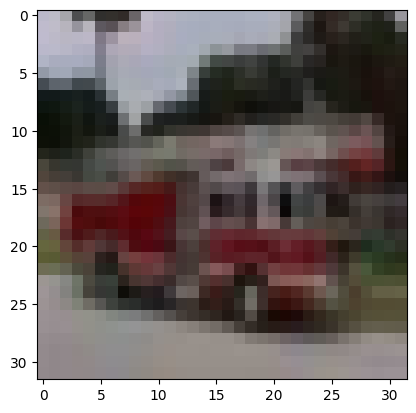

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
Prediction: truck


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define the path to your dataset
data_dir = "E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\cifar10_dataset"

# Set up the image data generator with a validation split
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% of data for validation/testing

# Load the training data with 80% of the images and set aside 20% for validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resize images to CIFAR-10 dimensions
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Define the feedforward neural network
model = Sequential()

# Flatten the 32x32x3 images into a 1D vector of 3072 (32*32*3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add another fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

# Evaluate the model on the validation data
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

# Visualize an example image and its predicted label
class_labels = list(train_generator.class_indices.keys())
n = 5  # Index of the image to visualize
X_test, y_test = next(validation_generator)  # Get a batch of validation images
plt.imshow(X_test[n])
plt.show()
cifars = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
idx =(int) (class_labels[pred])
print('Prediction:', cifars[idx] )